In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.10.0'

**Data generation**

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))
generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')
training_data

In [18]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(output_size, # np.dot(entradas, pesos) + bias
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                          ) 
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")
model.fit(training_data["inputs"], 
         training_data["targets"],
         epochs=100,
         verbose=True
)

Epoch 1/100
32/32 [==============================] - 0s 613us/step - loss: 33.4556
Epoch 2/100
32/32 [==============================] - 0s 581us/step - loss: 1.2579
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 613us/step - loss: 0.4205
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 0.3973
Epoch 6/100
32/32 [==============================] - 0s 613us/step - loss: 0.3950
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 0.3650
Epoch 8/100
32/32 [==============================] - 0s 645us/step - loss: 0.3776
Epoch 9/100
32/32 [==============================] - 0s 581us/step - loss: 0.3889
Epoch 10/100
32/32 [==============================] - 0s 564us/step - loss: 0.3865
Epoch 11/100
32/32 [==============================] - 0s 678us/step - loss: 0.3700
Epoch 12/100
32/32 [==============================] - 0s 613us/step - loss: 0.3957
Epoch 13/100

**Extraemos los pesos y el sesgo**

In [19]:
model.layers[0].get_weights()

[array([[ 1.9710326],
        [-3.0147877]], dtype=float32),
 array([4.9929414], dtype=float32)]

In [20]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(f"weights: {weights}, bias: {bias}")

weights: [[ 1.9710326]
 [-3.0147877]], bias: [4.9929414]


### Predicciones

In [21]:
model.predict_on_batch(training_data["inputs"]).round(1)

array([[-19.4],
       [ 19.6],
       [ 28.5],
       [ -8.6],
       [ 13.9],
       [ 22.6],
       [ 10.4],
       [-21. ],
       [-23.1],
       [ 26.7],
       [-30.1],
       [ -5. ],
       [  1.4],
       [ 40.5],
       [ -8.4],
       [ 17.6],
       [ 15.5],
       [ 46.6],
       [  1.7],
       [-16.9],
       [ 41.6],
       [ 13.5],
       [  1.9],
       [  9.3],
       [ -0.5],
       [-10.7],
       [  1.8],
       [-11.1],
       [ 32.5],
       [ 13.4],
       [-20.3],
       [  5.1],
       [ 23.3],
       [ 24.7],
       [ 10.1],
       [-28.1],
       [-19.9],
       [ 19.7],
       [-12.5],
       [-17.8],
       [ 37.3],
       [  7.6],
       [ 18.6],
       [ 19.6],
       [ -1.9],
       [-27.6],
       [ 15.4],
       [ 26.9],
       [-20.7],
       [ 30.8],
       [  5.1],
       [ 22.1],
       [ -8.2],
       [ 13.9],
       [ 23.1],
       [-24.4],
       [ 10.2],
       [-14.1],
       [  7.3],
       [  4.4],
       [-13.8],
       [ -3.8],
       [

In [22]:
training_data["targets"].round(1)

array([[-19. ],
       [ 19.2],
       [ 28.8],
       [ -8.9],
       [ 14.9],
       [ 23.2],
       [  9.7],
       [-21.7],
       [-23.4],
       [ 26.4],
       [-30.9],
       [ -4.6],
       [  1.1],
       [ 41.2],
       [ -8.3],
       [ 16.8],
       [ 16.6],
       [ 47.2],
       [  2.8],
       [-16.8],
       [ 41.1],
       [ 12.7],
       [  2.9],
       [  8.8],
       [  0.7],
       [-10.4],
       [  1.1],
       [-10.6],
       [ 32.8],
       [ 14.3],
       [-20.9],
       [  5.7],
       [ 23.4],
       [ 24.3],
       [  9. ],
       [-27.2],
       [-20.3],
       [ 18.6],
       [-12.1],
       [-16.8],
       [ 37.1],
       [  6.5],
       [ 17.5],
       [ 19.6],
       [ -1.7],
       [-27.2],
       [ 15.8],
       [ 26. ],
       [-20.5],
       [ 30. ],
       [  4.5],
       [ 22.2],
       [ -7.8],
       [ 14.9],
       [ 23.7],
       [-24.1],
       [ 11.4],
       [-14.6],
       [  8.1],
       [  4.2],
       [-13.9],
       [ -4.1],
       [

**Graficando los datos**

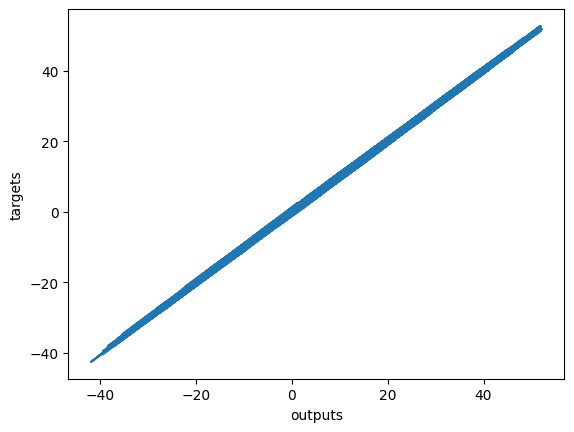

In [23]:
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()